In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [2]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Mon Jan 20 00:12:53 2020


In [3]:
import numpy as np
import pandas as pd
import matplotlib

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from enum import Enum
from scipy.linalg import norm
from scipy.special import erfc

In [5]:
from IPython.display import Image 

In [6]:
from dataclasses import dataclass
import abc
from typing import Sequence

from pynext.system_of_units import *
from pynext.graphics import draw_cylinder
from pynext.graphics import draw_sphere
from pynext.graphics import draw_vuv
from pynext.graphics import draw_spherical_sample
from pynext.pynext_types import Cylinder, Sphere
from pynext.pynext_types import FiberWLS
from pynext.pynext_types import SiPM

In [7]:
from pynext.pynext_base import sample_spherical
from pynext.pynext_base import vuv_transport
from pynext.pynext_base import  xyz_from_vuv
from pynext.pynext_base import  vuv_fractions
from pynext.pynext_plot import  display_figure
from pynext.pynext_plot import  display_figures

## Definition of a SiPM

## Hamamatsu S13360 PDF

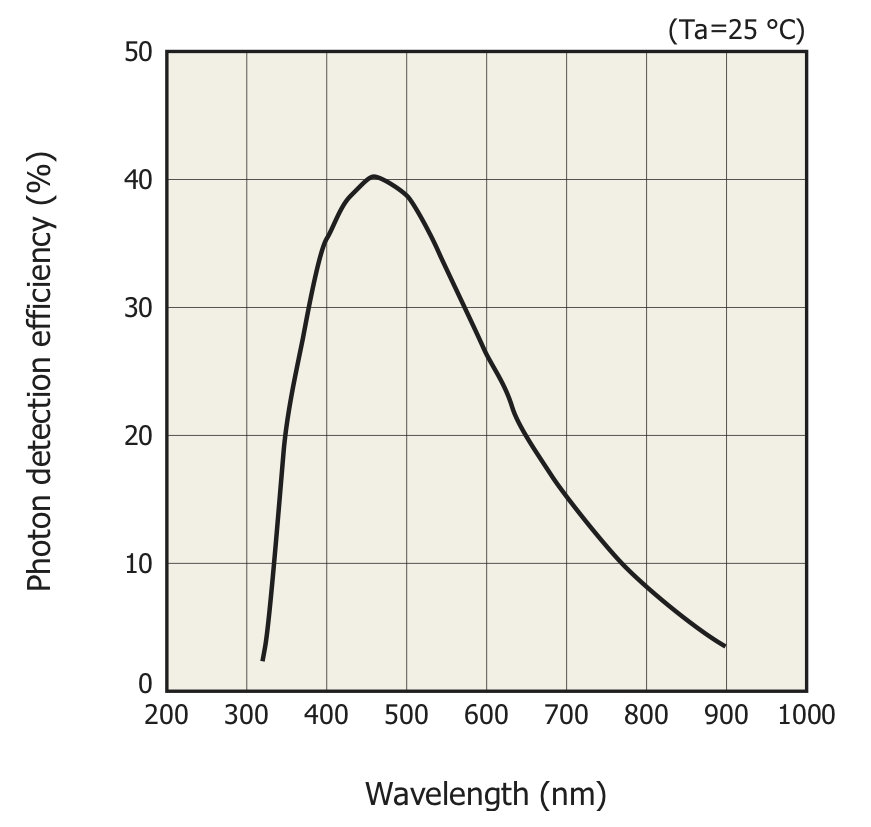

In [8]:
Image(filename = "s13360.png")  

In [10]:
s13360 = SiPM(name='s13360', xsize=2*mm, PDE = 0.4, C = 150*pF, Rs=100*ohm)
s13360


        sensor =s13360, size = 2.0 mm, PDE = 0.4
        capacitance = 150.00 pF; 
        

In [12]:
T = np.arange(25, -105, -1)
DCR = (1*mm)**2 * np.array([s13360.dcr_sipm_per_unit_area(t)/ hertz for t in T])

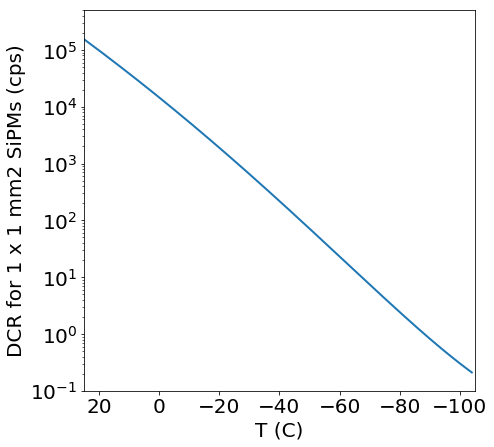

In [13]:
display_figure(T, DCR,'T (C)', 'DCR for 1 x 1 mm2 SiPMs (cps)', xlim=[25,-105], ylim=[0.1,5e+5], log='logy', xl = None, yl=None, lw=2, figsize=(7,7) )

In [15]:
print(f'DCR at 25 C ={s13360.dcr_sipm_per_unit_area(25)/ hertz:.2e} cps')

DCR at 25 C =1.54e+05 cps


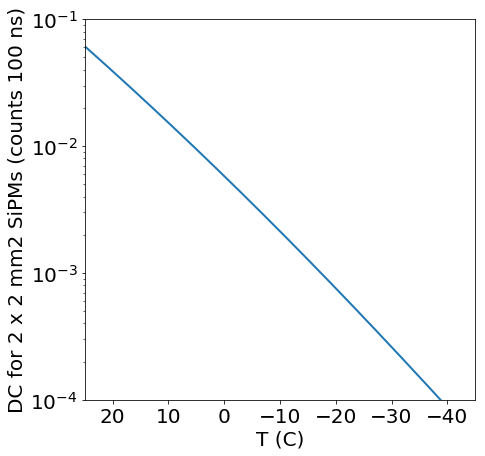

In [19]:
display_figure(T, s13360.dcr_sipm_per_time(T, 100 * ns) ,'T (C)', 'DC for 2 x 2 mm2 SiPMs (counts 100 ns)', xlim=[25,-45], ylim=[1e-4,1e-1], log='logy', xl = None, yl=None, lw=2, figsize=(7,7) )

In [14]:
L = np.arange(300, 900, 1)

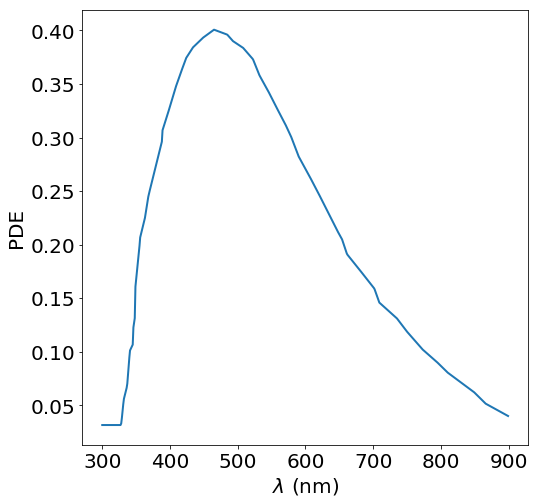

In [15]:
display_figure(L, s13360.pde(L), '$\lambda$ (nm)', 'PDE', log=False, xlim=None, ylim=None, xl=None, yl=None,
                   lw=2, fontsize=20, figsize=(8,8))